In [1]:
import importlib
import pandas as pd
import pysam

import SRRS
from SRRS import plotting, utils

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setup the bam_path and chrom/start/end (below is Timp3)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr10'
start = 86344341
end = 86350020


In [5]:
#setup the bam_path and chrom/start/end (Camk2d)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr3'
start = 126842239
end = 126846831

In [7]:
#setup the bam_path and chrom/start/end (Ano4)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr10'
start = 88948995
end = 89257590

In [10]:
#setup the bam_path and chrom/start/end (Bcl11b)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr12'
start = 107909741
end = 107918803

In [13]:
#setup the bam_path and chrom/start/end (Chn2)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr6'
start = 54299496
end = 54302308

In [15]:
#setup the bam_path and chrom/start/end (Inpp4b)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr8'
start = 82119031
end = 82129890

In [19]:
#setup the bam_path and chrom/start/end (Luzp2)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr7'
start = 55265030
end = 55269021

In [23]:
#setup the bam_path and chrom/start/end (Pou3f3)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr1'
start = 42695391
end = 42703580

In [26]:
#setup the bam_path and chrom/start/end (Ptprt)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr2'
start = 161520668
end = 161530060

In [29]:
#setup the bam_path and chrom/start/end (Sulf2)
bam_path = 'ont_L8TX_181211_01_A01.bam'

chrom = 'chr2'
start = 166072498
end = 166075426

In [4]:
#get Readzs proxy values to map onto the cell-type
importlib.reload(utils)
ont_scores = utils.readzs_proxy_score(
    bam_path, locus=(chrom, start, end),
    stratify_tag='XO', min_ont_reads=0,
)
periph_df['readzs'] = periph_df['ontology'].map(ont_scores)
periph_df = periph_df.dropna()
periph_df

,ontology,med_score,readzs
6,Lamp5,0.074057,0.298028
8,Oligo,0.180963,0.153108
10,Sst,0.075867,0.298204
12,Vip,0.086283,0.280067


In [3]:
full_gtf = pd.read_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/inputs/gencode.vM23.annotation.gtf',
    comment = '#',
    sep = '\t',
    header = None,
    names = ['chrom','source','kind','start','end','dot1','strand','dot2','info'],
)
gtf = full_gtf[full_gtf['kind'].isin(['exon','UTR'])]
gtf['label'] = gtf['info'].str.extract('gene_name "(.*?)";')
gtf['group'] = gtf['info'].str.extract('transcript_id "(.*?)";')

gtf.head()

,chrom,source,kind,start,end,dot1,strand,dot2,info,label,group
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ...",4933401J01Rik,ENSMUST00000193812.1
5,chr1,ENSEMBL,exon,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ...",Gm26206,ENSMUST00000082908.1
8,chr1,HAVANA,exon,3213609,3216344,.,-,.,"gene_id ""ENSMUSG00000051951.5""; transcript_id ...",Xkr4,ENSMUST00000162897.1
9,chr1,HAVANA,exon,3205901,3207317,.,-,.,"gene_id ""ENSMUSG00000051951.5""; transcript_id ...",Xkr4,ENSMUST00000162897.1
11,chr1,HAVANA,exon,3213439,3215632,.,-,.,"gene_id ""ENSMUSG00000051951.5""; transcript_id ...",Xkr4,ENSMUST00000159265.1


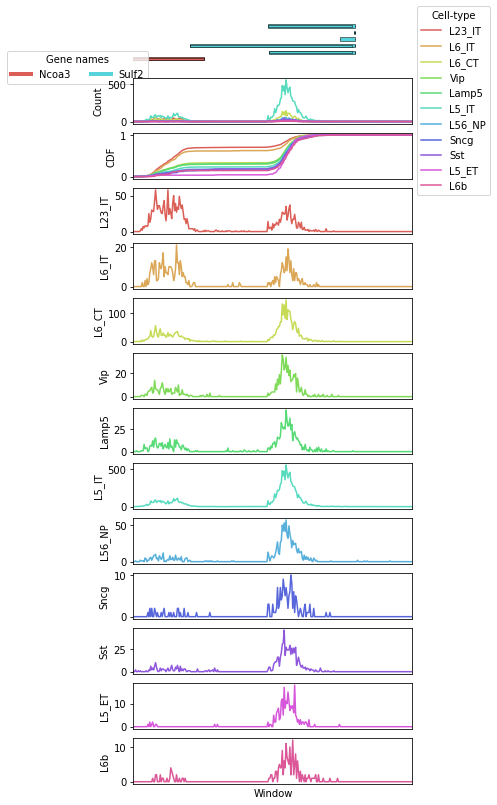

CPU times: user 2.36 s, sys: 159 ms, total: 2.52 s
Wall time: 2.52 s


In [38]:
%%time
importlib.reload(plotting)

fig = plotting.read_buildup_plot(
    bam_path, locus=(chrom, start, end), ann_df=gtf,
    stratify_tag='XO', 
    ws=10, min_ont_counts=100,
)


plt.show()
plt.close()